<a href="https://colab.research.google.com/github/Matheusbcy/-Data-Science-IA-/blob/main/Agrupamento_de_empresas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [3]:
with open("/content/bases_classificacao.pkl", "rb") as f:
  dataset, dataset_original, X, y, empresas, scaler = pickle.load(f)

In [4]:
dataset

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,78,79,80,81,82,83,84,85,86,87
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
343,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
344,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.350000,-7.350000,0.330000,-271.00000,21.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
345,8.596999e+09,1.021776e+10,2.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,-8.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [6]:
labels = kmeans.labels_
labels

array([1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1,
       1, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,

In [7]:
np.unique(labels, return_counts = True)

(array([0, 1, 2], dtype=int32), array([ 15, 229, 103]))

In [8]:
centroids = pd.DataFrame(data = kmeans.cluster_centers_, columns = [dataset.columns])
centroids

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,78,79,80,81,82,83,84,85,86,87
0,0.010252,0.007440,0.000702,0.803470,0.193763,0.498735,0.243208,0.409421,0.877806,0.125461,...,-8.673617e-19,-8.673617e-19,-8.673617e-19,-4.336809e-19,-4.336809e-19,9.333333e-01,6.666667e-02,2.775558e-17,-2.775558e-17,-8.673617e-19
1,0.017519,0.018408,0.006716,0.820843,0.206737,0.502864,0.253228,0.413063,0.879689,0.127680,...,4.366812e-03,8.733624e-03,4.366812e-03,-9.540979e-18,-9.540979e-18,1.000000e+00,-1.387779e-17,4.440892e-16,-2.775558e-17,-1.908196e-17
2,0.063012,0.028603,0.026541,0.835558,0.204516,0.520860,0.267428,0.452078,0.889267,0.166484,...,9.708738e-03,6.938894e-18,9.708738e-03,9.708738e-03,9.708738e-03,1.998401e-15,1.650485e-01,4.660194e-01,3.495146e-01,1.941748e-02


In [9]:
centroids = scaler.inverse_transform(centroids)
centroids = pd.DataFrame(data = centroids, columns = [dataset.columns])
centroids

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,78,79,80,81,82,83,84,85,86,87
0,2.939285e+09,3.692803e+09,1268.066667,-29.351269,-181.232533,-4.916673,-4.582943,0.924215,-13910.523601,3.800000,...,-8.673617e-19,-8.673617e-19,-8.673617e-19,-4.336809e-19,-4.336809e-19,9.333333e-01,6.666667e-02,2.775558e-17,-2.775558e-17,-8.673617e-19
1,5.022582e+09,9.175871e+09,12115.613159,-12.544098,61.392262,2.218030,8.090002,1.071229,-11624.411442,47.988458,...,4.366812e-03,8.733624e-03,4.366812e-03,-9.540979e-18,-9.540979e-18,1.000000e+00,-1.387779e-17,4.440892e-16,-2.775558e-17,-1.908196e-17
2,1.806502e+10,1.427237e+10,47873.245322,1.692272,19.851961,33.314077,26.051125,2.645853,5.170796,820.534817,...,9.708738e-03,6.938894e-18,9.708738e-03,9.708738e-03,9.708738e-03,1.998401e-15,1.650485e-01,4.660194e-01,3.495146e-01,1.941748e-02


In [10]:
dataset_cluster = pd.concat([dataset_original, pd.DataFrame({"cluster": labels})], axis = 1)
categoria_cluster = dataset_cluster.groupby(["Categoria", "cluster"])["cluster"].count()
categoria_cluster

Categoria                 cluster
alerta                    0.0          9
                          1.0        155
                          2.0         63
crescimento               0.0          1
                          1.0         10
                          2.0          6
crescimento moderado      0.0          2
                          1.0         25
                          2.0         16
dividendos                0.0          2
                          1.0         17
                          2.0         12
dividendos + crescimento  1.0          2
Name: cluster, dtype: int64

In [11]:
situacao_cluster = dataset_cluster.groupby(["Situação", "cluster"])["cluster"].count()
situacao_cluster

Situação  cluster
boa       0.0          4
          1.0         44
          2.0         33
medio     0.0          4
          1.0         54
          2.0         22
ruim      0.0          6
          1.0        111
          2.0         42
Name: cluster, dtype: int64

In [12]:
segmento_cluster = dataset_cluster.groupby(["Segmento", "cluster"])["cluster"].count()
segmento_cluster

Segmento               cluster
acessorios             1.0        2
agricultura            1.0        3
                       2.0        1
agua e saneamento      0.0        2
                       1.0        2
                                 ..
transporte rodoviario  1.0        1
                       2.0        1
utensilios domesticos  1.0        2
vestuario              1.0        1
viagens e turismo      1.0        1
Name: cluster, Length: 129, dtype: int64

In [13]:
pca = PCA(n_components = 2)
components = pca.fit_transform(X)
pca_df = pd.DataFrame(data = components, columns = ["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,0.275428,0.545645
1,-0.819727,1.174398
2,0.299001,0.507059
3,0.281592,0.527282
4,-1.031743,-0.659865


In [14]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": labels})], axis = 1)
pca_df

,pca1,pca2,cluster
0,0.275428,0.545645,1
1,-0.819727,1.174398,2
2,0.299001,0.507059,1
3,0.281592,0.527282,1
4,-1.031743,-0.659865,2
...,...,...,...
342,-0.733684,0.588206,2
343,0.341031,-0.009513,1
344,0.360642,-0.052204,1
345,0.386925,-0.085609,1


<Axes: xlabel='pca1', ylabel='pca2'>

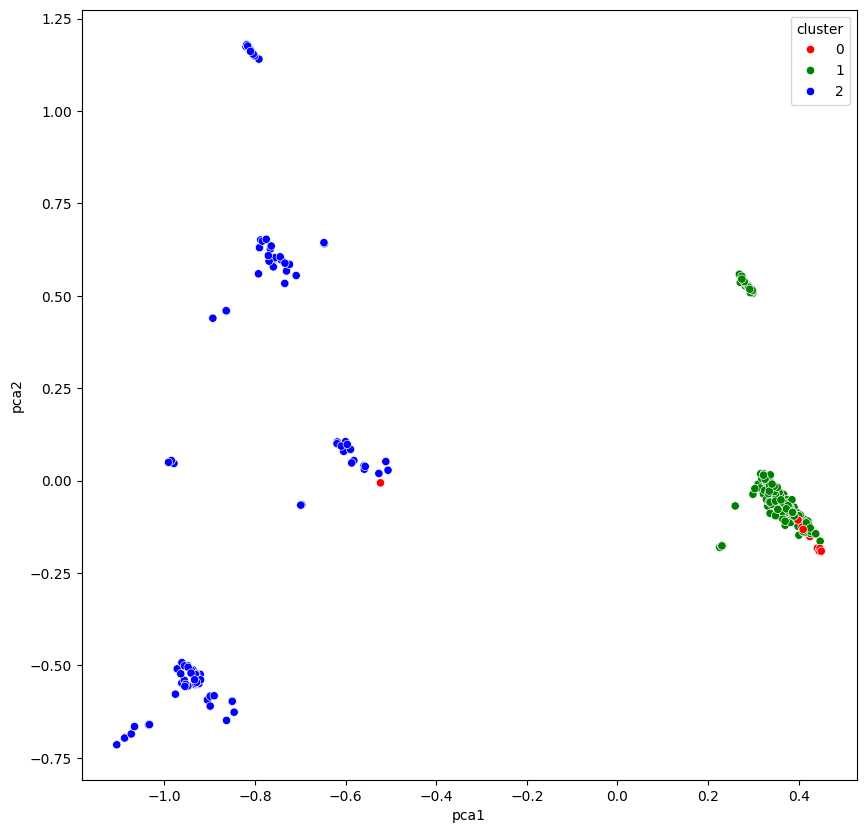

In [15]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = "pca1", y = "pca2", data = pca_df, hue="cluster", palette = ["red", "green", "blue"])